# Expenses Report

Courtesy of David Doowat

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
data = pd.read_csv('expenses-1.CSV')
data2 = pd.read_csv('expenses-2.CSV')

In [84]:
data.head()

,Transaction Date,Post Date,Description,Category,Type,Amount,Memo
0,05/29/2021,05/31/2021,MEIJER # 182,Groceries,Sale,-15.58,NaN
1,05/30/2021,05/31/2021,BLUE GOOSE SUPERMAR,Groceries,Sale,-108.97,NaN
2,05/30/2021,05/31/2021,LOWES #01738*,Home,Sale,-9.48,NaN
3,05/30/2021,05/31/2021,7-ELEVEN 33850,Gas,Sale,-8.63,NaN
4,05/29/2021,05/30/2021,DD/BR #352499,Food & Drink,Sale,-9.15,NaN


In [85]:
data1 = pd.concat([data, data2])

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction Date  79 non-null     object 
 1   Post Date         79 non-null     object 
 2   Description       79 non-null     object 
 3   Category          77 non-null     object 
 4   Type              79 non-null     object 
 5   Amount            79 non-null     float64
 6   Memo              0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 4.4+ KB


In [86]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 88
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction Date  168 non-null    object 
 1   Post Date         168 non-null    object 
 2   Description       168 non-null    object 
 3   Category          164 non-null    object 
 4   Type              168 non-null    object 
 5   Amount            168 non-null    float64
 6   Memo              0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 10.5+ KB


In [88]:
data1['month'] = data1['Transaction Date'].apply(lambda x: int(x[:2]))
data1['month']

0     5
1     5
2     5
3     5
4     5
     ..
84    3
85    4
86    3
87    3
88    3
Name: month, Length: 168, dtype: int64

In [89]:
data1['Amount'] = data1['Amount'].apply(abs)

<AxesSubplot:xlabel='Category'>

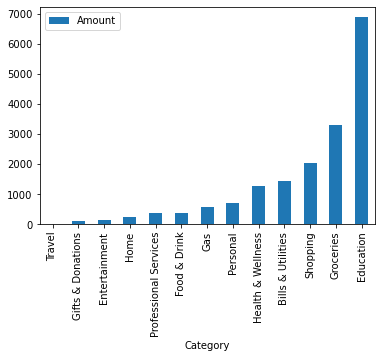

In [90]:
data1[['Amount', 'Category']].groupby('Category').sum().sort_values(by='Amount').plot(kind='bar')

In [91]:
data1.Description = data1.Description.apply(lambda x: x.lower())

<AxesSubplot:xlabel='month'>

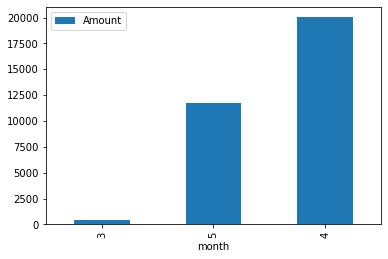

In [92]:
data1[['Amount', 'month']].groupby('month').sum().sort_values(by='Amount').plot(kind='bar')



In [103]:
def expense_types_by_month(data, kind='bar'):
    '''returns a stacked bar chart grouping expenses by month and category'''

    categories = data['Category'].value_counts().index
    margin_bottom = np.zeros(len(data['month'].drop_duplicates()))

    if kind=='bar':
        fig, ax = plt.subplots(figsize=(10,7))   
        
        for num, category in enumerate(categories):
            values = list(data[data['Category']==category][['Amount', 'month']].groupby('month').sum().sort_values(by='month').values.reshape(1,-1)[0])

            if len(values)==0:
                dollars = [0,0,0]
            elif len(values)==1:
                dollars = [0,0] + values 
            elif len(values)==2:
                dollars = [0] + values
            elif len(values)==3:
                dollars = values
            else:
                print("We have a problem here", values)

            ax.bar(x=["March", 'April', 'May'], height=dollars, bottom=margin_bottom, label=category)

            margin_bottom += dollars
            
        ax.legend()
        ax.set_ylabel('Amount Spent (Dollars)')
        ax.set_xlabel('Month')
        ax.set_title('Expenses by Month & Category', size=20)

    
    if kind=='pie':
        fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(19,9))  
        
        for num, month in enumerate(sorted(data['month'].value_counts().index)):
            values = list(data[data['month']==month][['Amount', 'Category']].groupby('Category').sum().values.reshape(1,-1)[0])
            labels = data[data['month']==month][['Amount', 'Category']].groupby('Category').sum().index
            ax[num].pie(values, labels=labels, autopct='%1.1f%%')
            
            if num == 0:  
                ax[num].set_title('March', size=14)
            elif num == 1:  
                ax[num].set_title('April', size=14)
            elif num == 2:  
                ax[num].set_title('May', size=14)
        
        fig.suptitle('Expenses by Month & Category', size=20)
        fig.tight_layout()


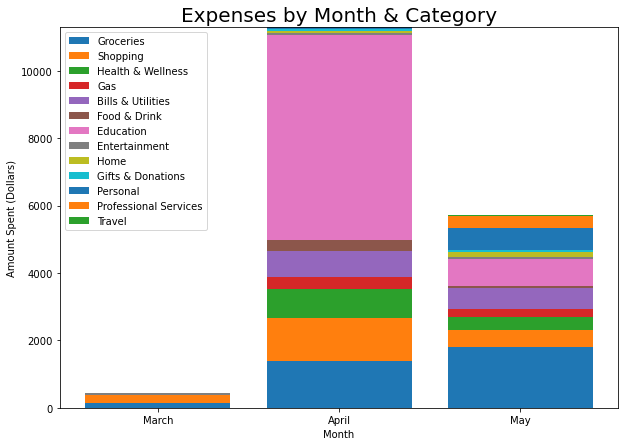

In [94]:
expense_types_by_month(data1)

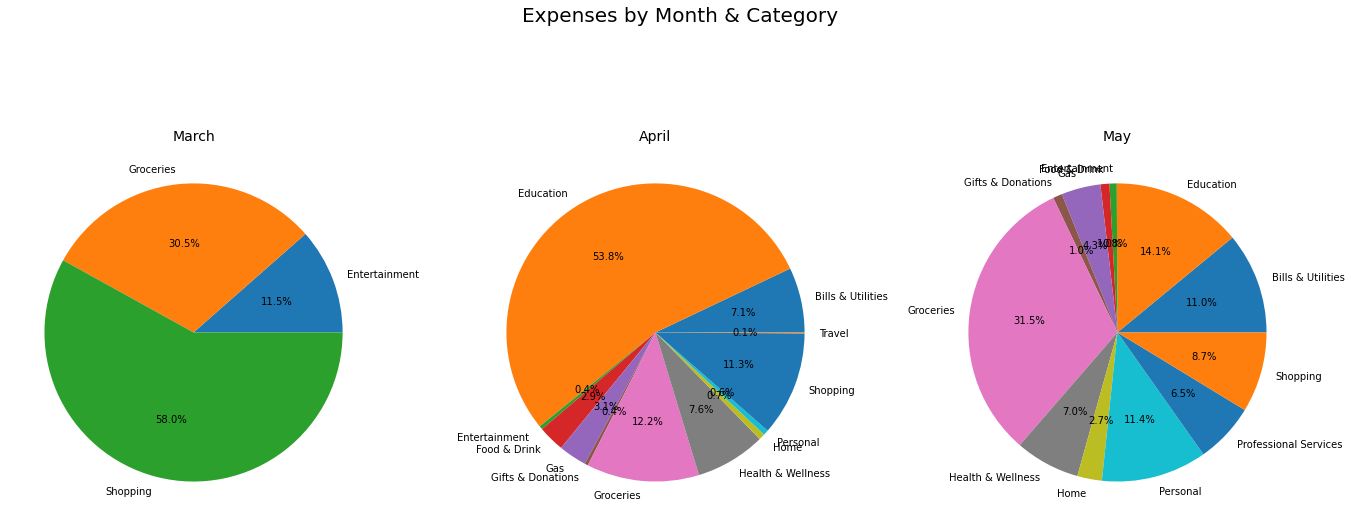

In [104]:
expense_types_by_month(data1, kind='pie')

In [61]:
data1[['Amount', 'Category']].groupby('Category').sum()

,Amount
Category,
Bills & Utilities,997.76
Education,460.00
Food & Drink,140.74
Gas,8.63
Gifts & Donations,80.00
Groceries,2012.00
Health & Wellness,24.52
Home,90.87
Professional Services,1.99


In [113]:
def desc_sorter(desc):
    '''Sorts expenses based on store titles'''
    chars = '*#.0123456789'

    for i in range(len(desc)):
        if desc[i] in chars:
            desc = desc[:i]
            break

In [100]:
data1.Description.value_counts()

meijer # 182                 22
angelo caputo's fre           3
automatic payment - thank     2
icp*goldfish swim school      2
the fresh market 059          2
amzn mktp us                  2
city of st. charles           2
blue goose supermar           2
sprint *wireless              2
st patrick church             2
lowes #01738*                 2
walgreens #6795               2
dairy queen #15200            1
audible*2r0ss94n2             1
amzn mktp us*az9ro3i43        1
frankys red hots              1
amazon.com*c18q21mn3          1
7-eleven 33850                1
amazon.com*2p2jg51x3          1
amzn mktp us*t93pa8c53        1
amzn mktp us*986od8rq3        1
lakeshore recycling syst      1
amazon.com*2r7lj5zl2          1
amzn mktp us*2r49z1ct1        1
kindle unltd*td1we2203        1
amazon.com*n46s530e3          1
amzn mktp us*2l5zi1600        1
amzn mktp us*ky02f6ad3        1
amzn mktp us*hs1ax0273        1
chipotle 3849                 1
amzn mktp us*ae6fw2r83        1
kindle u